# 2. Disease prediction

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = "../Data/cardio_train.csv"

df = pd.read_csv(file_path, sep= ";")

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 2.0 - EDA uppvärmning 

---

### **a)** 
### Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

---

In [18]:
negative, positive = df["cardio"].value_counts()
print(f"Negative: {negative}")
print(f"Positive: {positive}")

Negative: 35021
Positive: 34979


### **b)** 
### Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

---

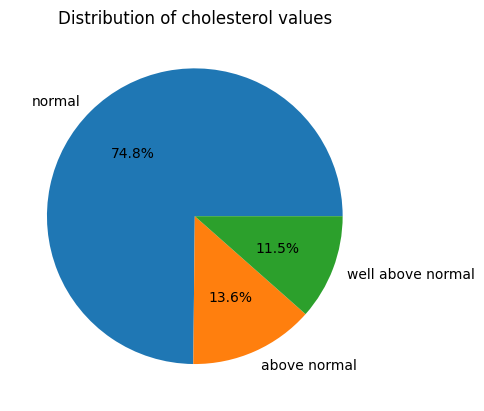

In [23]:
plt.pie(df["cholesterol"].value_counts(), labels= ["normal", "above normal", "well above normal"], autopct="%1.1f%%");
plt.title("Distribution of cholesterol values");

### **c)** 
### Hur ser åldersfördelningen ut? Rita ett histogram.

---

<Axes: xlabel='age', ylabel='Count'>

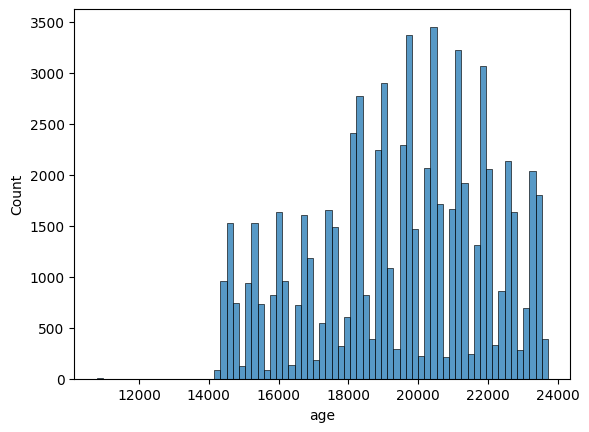

In [29]:
sns.histplot(data= df, x= "age")

### **d)** 
### Hur stor andel röker?

---

Text(0.5, 1.0, 'Distribution of smokers')

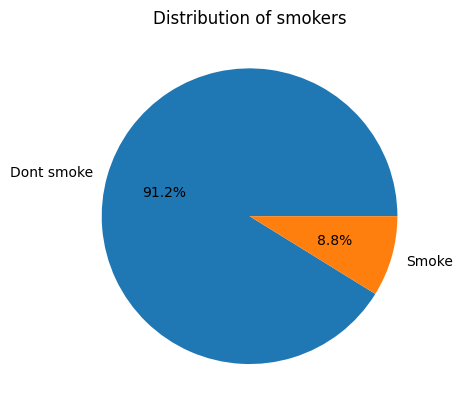

In [33]:
plt.pie(df["smoke"].value_counts(), labels= ["Dont smoke", "Smoke"], autopct="%1.1f%%");
plt.title("Distribution of smokers")

### **e)** 
### Hur ser viktfördelningen ut? Rita lämpligt diagram.

---

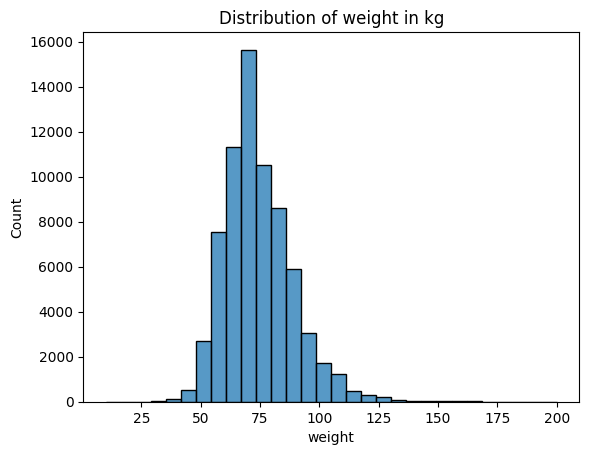

In [39]:
sns.histplot(data= df, x= "weight", bins= 30).set(title="Distribution of weight in kg");


### **f)** 
### Hur ser längdfördelningen ut? Rita lämpligt diagram.

---

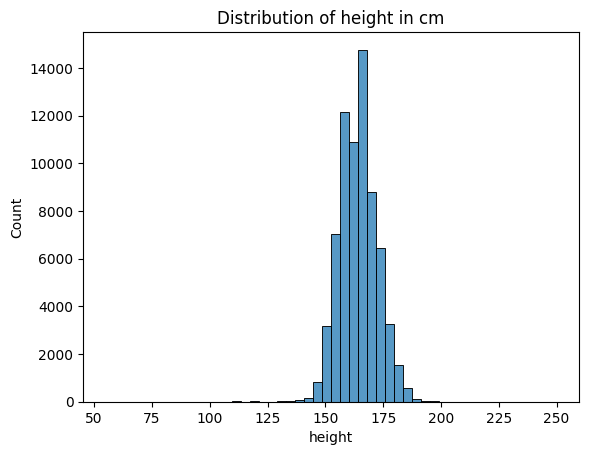

In [42]:
sns.histplot(data= df, x= "height", bins= 50).set(title="Distribution of height in cm");

### **g)** 
### Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

---

Text(0.5, 1.0, 'Distribution of Cardiovascular Disease Men')

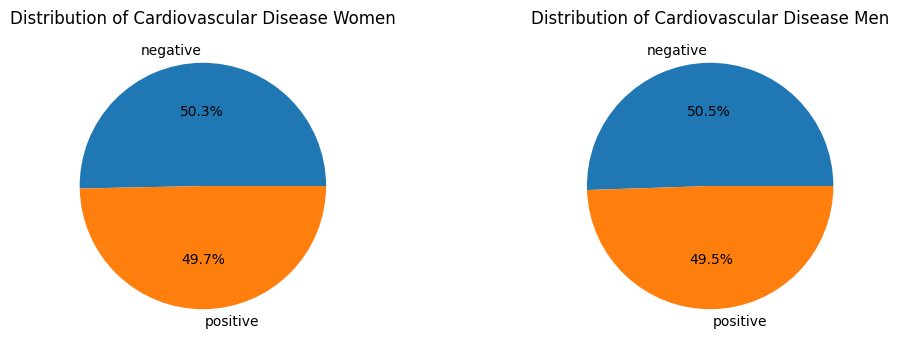

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 4))

# female
f_negative, f_positive = df["cardio"].loc[df["gender"] == 1].value_counts()
# male
m_negative, m_positive = df["cardio"].loc[df["gender"] == 2].value_counts()

ax1.pie(x=[f_negative, f_positive], labels= ["negative", "positive"], autopct="%1.1f%%");
ax1.set_title("Distribution of Cardiovascular Disease Women")

ax2.pie(x=[m_negative, m_positive], labels= ["negative", "positive"], autopct="%1.1f%%");
ax2.set_title("Distribution of Cardiovascular Disease Men")

    